# Ejercicio 1

**Use el método de bisección para encontrar soluciones precisas dentro de $10^{-2}$ para $x^3 - 7x^2 + 14x - 6 = 0$ en cada intervalo.**

Para empezar, se dibuja la gráfica de la función requerida para de este modo tener una mejor visualización del ejercicio y la bisección a realizar.

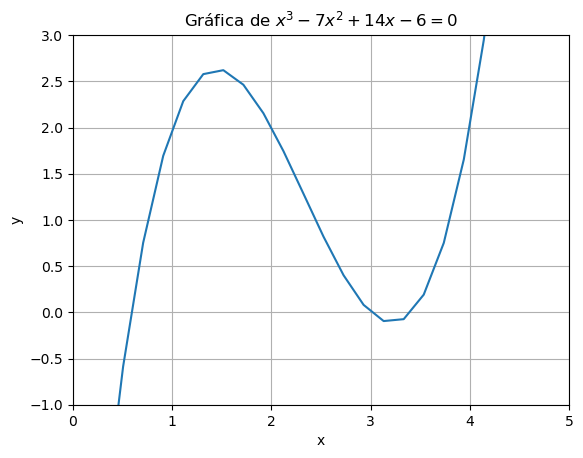

In [213]:
import numpy as np

import matplotlib.pyplot as plt

def equation(x:float)->float:
    return (x**3 - 7*x**2 + 14*x - 6)

x = np.linspace(-10, 10, 100)

y = equation(x)

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de $ x^{3} - 7x^{2} + 14x - 6 = 0$')
ax = plt.gca()
ax.set_ylim([-1, 3])
ax.set_xlim([0, 5])
plt.grid(True)
plt.show()

El método de la bisección es aplicado mediante la función definida en Python a continuación:

In [215]:
from typing import Callable
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
    

def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> tuple[float, float, float, int] | None:
    i = 1

    assert a < b, "a not lower than b, the interval is not valid."
    assert (
        equation(a) * equation(b) < 0
    ), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a 
    for i in range(N):
        p = a + (b - a) / 2
        FP = equation(p)
        if FP == 0 or (b - a) / 2 < tol:
            return p, a, b, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
        else:
            b = p
    return p, a, b, i


**a. $[0,1]$**

In [217]:
a = 0
b = 1
tol = 10**(-2)

result= bisection(a = a, b=b,equation=equation,tol = tol, N = 20)
print(f"Usando el intervalo [{a}, {b}], en la iteración #{result[3]} \nse encontró que la raíz de f(x), con una precisión de {tol:.0e}, \nes aproximadamente {result[0]}")

Usando el intervalo [0, 1], en la iteración #6 
se encontró que la raíz de f(x), con una precisión de 1e-02, 
es aproximadamente 0.5859375


**b. $[1, 3.2]$**

In [219]:
a = 1
b = 3.2
tol = 10**(-2)

result= bisection(a = a, b=b,equation=equation,tol = tol, N = 20)
print(f"Usando el intervalo [{a}, {b}], en la iteración #{result[3]} \nse encontró que la raíz de f(x), con una precisión de {tol:.0e}, \nes aproximadamente {result[0]}")

Usando el intervalo [1, 3.2], en la iteración #7 
se encontró que la raíz de f(x), con una precisión de 1e-02, 
es aproximadamente 3.0023437500000005


**c. $[3.2,4]$**

In [221]:
a = 3.2
b = 4
tol = 10**(-2)

result= bisection(a = a, b=b,equation=equation,tol = tol, N = 20)
print(f"Usando el intervalo [{a}, {b}], en la iteración #{result[3]} \nse encontró que la raíz de f(x), con una precisión de {tol:.0e}, \nes aproximadamente {result[0]}")

Usando el intervalo [3.2, 4], en la iteración #6 
se encontró que la raíz de f(x), con una precisión de 1e-02, 
es aproximadamente 3.41875


# Ejercicio 4

**a. Dibuje las gráficas para $y = x^{2} - 1$ y $y = e^{1-x^{2}}$**


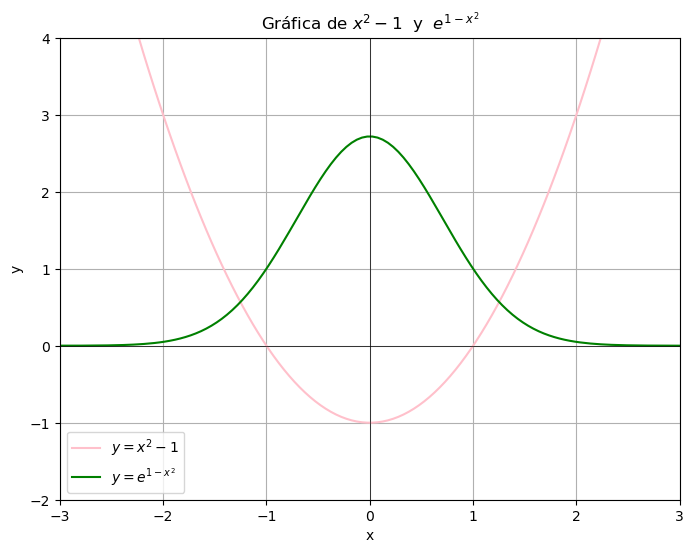

In [224]:
import numpy as np
import matplotlib.pyplot as plt

def equation1(x:float)->float:
    return ((x**2) - 1)

def equation2(x:float)->float:
    return np.exp(1-x**2)

x = np.linspace(-5, 5, 200)
y1 = equation1(x)
y2 = equation2(x)
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$y = x^{2} - 1$', color='pink')
plt.plot(x, y2, label=r'$y = e^{1-x^{2}}$', color='green')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de $x^{2}-1$  y  $e^{1-x^{2}}$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
ax = plt.gca()
ax.set_ylim([-2, 4])
ax.set_xlim([-3, 3])

plt.grid(True)
plt.legend()
plt.show()

**b. Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para un valor de $[-2,0]$ con $x^{2} - 1 = e^{1-x^{2}}$**

Para visualizar mejor el problema, se proporciona la gráfica correspondiente a la función.

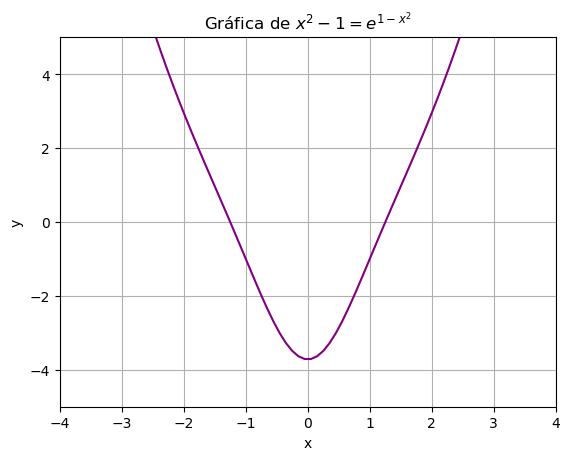

In [227]:
def eq(x):
    return ((x**2) - 1)-(np.exp(1-x**2))


x = np.linspace(-5, 5, 100)

y = eq(x)

plt.plot(x, y, label = '$x^{2} - 1 = e^{1-x^{2}}$', color = 'purple')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de $x^{2} - 1 = e^{1-x^{2}}$')
ax = plt.gca()
ax.set_ylim([-5, 5])
ax.set_xlim([-4, 4])
plt.grid(True)
plt.show()

In [228]:
a = -2
b = 0
tol = 10**(-3)

result= bisection(a = a, b=b,equation=eq,tol = tol, N = 20)
print(f"Usando el intervalo [{a}, {b}], en la iteración #{result[3]} \nse encontró que la raíz de f(x), con una precisión de {tol:.0e}, \nes aproximadamente {result[0]}")

Usando el intervalo [-2, 0], en la iteración #10 
se encontró que la raíz de f(x), con una precisión de 1e-03, 
es aproximadamente -1.2509765625


# Ejercicio Aplicado 1

**Un abrevadero de longitud 𝐿 tiene una sección transversal en forma de semicírculo con radio 𝑟. (Consulte la figura adjunta.) Cuando se llena con agua hasta una distancia ℎ a partir de la parte superior, el volumen 𝑉 de agua es:**

$V = L \left( 0.5 \pi r^2 - r^2 \arcsin\left(\frac{h}{r}\right) - h \sqrt{r^2 - h^2} \right)$


**Suponga que 𝐿 = 10 𝑐𝑚, 𝑟 = 1 𝑐𝑚 y 𝑉 =12.4 𝑐𝑚. Encuentre la profundidad del agua en el abrevadero dentro de 0.01 _cm_**


_Datos del Ejercicio:_

* Tolerancia: $0.01 cm$
* Intervalo: $[h_{min}, h_{max}]$, es decir: $[0,1]$ 

In [232]:
import math 

L = 10
r = 1
V_dado = 12.4
tol = 0.01


def f_h(h):
    V_calculado = L * (0.5 * math.pi * r**2 - r**2 * math.asin(h / r) - h * math.sqrt(r**2 - h**2))
    return V_calculado - V_dado

result = bisection(a=0,b=r,equation=f_h,tol=tol,N=20)
print(f"Usando el intervalo [{a}, {b}], en la iteración #{result[3]} \nse encontró que la raíz de f(x), con una precisión de {tol:.0e}, \nes aproximadamente {result[0]}")

Usando el intervalo [-2, 0], en la iteración #6 
se encontró que la raíz de f(x), con una precisión de 1e-02, 
es aproximadamente 0.1640625


# Ejercicio Aplicado 2

**Un objeto que cae verticalmente a través del aire está sujeto a  una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa 𝑚 cae desde una altura 𝑠 y que la altura del objeto después de 𝑡segundos es**

$s(t) = s_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-\frac{kt}{m}} \right),$

**donde $( g = 9.81, \text{m/s}^2 )$ y $(k)$ representa el coeficiente de la resistencia del aire en $( \text{Ns/m})$. Suponga $( s_0 = 300, \text{m})$, $( m = 0.25 \, \text{kg})$ y $(k = 0.1, \text{Ns/m})$. Encuentre, dentro de $(0.01 \, \text{segundos})$, el tiempo que tarda un cuarto de kg en golpear el piso.**

In [235]:
s0 = 300       
m = 0.25       
k = 0.1        
g = 9.81
tol = 0.01

def f_t(t):
    s_t = s0 - (m * g / k) * t + (m**2 * g / k**2) * (1 - math.exp(-k * t / m))
    return s_t

result = bisection(a=0,b=s0,equation=f_t,tol=tol,N=20)

print(f"Con el intervalo [0, {s0}], en la iteración #{result[3]} \nse encontró que la raíz de f(t), con una precisión de {tol:.0e}, \nes aproximadamente {result[0]} seg.")

Con el intervalo [0, 300], en la iteración #14 
se encontró que la raíz de f(t), con una precisión de 1e-02, 
es aproximadamente 14.7308349609375 seg.


# Ejercicio Teórico 1



**Use el teorema 2.1. para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $10^{-4}$ para la solución de $x^{3}-x-1=0$ que se encuentra dentro del intervalo $[1,2]$. Encuentre una aproximación para la raíz con este grado de precisión.**

In [238]:
a = 1
b = 2
tol = 10**(-4)
def equation3(x):
    return (x**(3)-x-1)

result = bisection(a=a,b=b,equation=equation3,tol=tol,N=20)

print(f"Después de {result[3] + 1} iteraciones, \nla solución aproximada con una precisión de {tol:.0e} es: {result[0]}")

Después de 14 iteraciones, 
la solución aproximada con una precisión de 1e-04 es: 1.32476806640625
